In [204]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import StandardScaler

# Data Loading

In [2]:
df1 = pd.read_csv('Hyd_house_rent_data.csv')
df1.head()

,active,amenities,balconies,bathroom,combineDescription,completeStreetName,deposit,facing,facingDesc,floor,...,property_size,reactivationSource,rent_amount,sharedAccomodation,shortUrl,swimmingPool,totalFloor,type_bhk,waterSupply,weight
0,True,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",3,3,NaN,"Shreya carnation, Block I, NCB Enclave, Gachib...",90000,W,West,3,...,2200,USER_DASHBOARD,28000,False,http://nobr.kr/sv/9Kvqj,False,5,BHK3,CORP_BORE,NaN
1,True,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",1,2,NaN,"Inner Ring Rd, near RTO Bandlaguda South Zone",45000,E,East,2,...,1200,USER_DASHBOARD,15000,False,http://nobr.kr/sv/j2pD6,False,2,BHK3,BOREWELL,NaN
2,True,"{""LIFT"":true,""GYM"":true,""INTERNET"":false,""AC"":...",3,3,NaN,"Rd Number 2, Shirdi Sai Nagar, Manikonda, Hyde...",80000,E,East,0,...,1800,MISSED_CALL,16000,False,http://nobr.kr/sv/TXJmj,False,3,BHK3,CORP_BORE,NaN
3,True,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",1,2,NaN,"Plot No. 44, Road No. 1/A, kakatiya colony, LB...",18000,W,West,2,...,750,MISSED_CALL,9000,False,http://nobr.kr/sv/FnCsf,False,2,BHK2,CORP_BORE,NaN
4,True,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",2,2,NaN,"Madhapur HUDA Techno Enclave, Near MaxCure Su...",80000,E,East,2,...,1250,None,32500,False,http://nobr.kr/sv/BQFRb,False,5,BHK2,CORP_BORE,NaN


In [3]:
df1.shape

(19110, 36)

In [6]:
df1.columns

Index(['active', 'amenities', 'balconies', 'bathroom', 'combineDescription',
       'completeStreetName', 'deposit', 'facing', 'facingDesc', 'floor',
       'furnishingDesc', 'gym', 'id', 'isMaintenance', 'lift', 'loanAvailable',
       'locality', 'localityId', 'location', 'maintenanceAmount', 'ownerName',
       'parking', 'parkingDesc', 'propertyTitle', 'propertyType',
       'property_age', 'property_size', 'reactivationSource', 'rent_amount',
       'sharedAccomodation', 'shortUrl', 'swimmingPool', 'totalFloor',
       'type_bhk', 'waterSupply', 'weight'],
      dtype='object')

# Data Cleaning

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19110 entries, 0 to 19109
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   active              19110 non-null  bool   
 1   amenities           19110 non-null  object 
 2   balconies           19110 non-null  object 
 3   bathroom            19110 non-null  int64  
 4   combineDescription  0 non-null      float64
 5   completeStreetName  19108 non-null  object 
 6   deposit             19110 non-null  int64  
 7   facing              19110 non-null  object 
 8   facingDesc          9569 non-null   object 
 9   floor               19110 non-null  int64  
 10  furnishingDesc      19110 non-null  object 
 11  gym                 19110 non-null  bool   
 12  id                  19110 non-null  object 
 13  isMaintenance       19110 non-null  bool   
 14  lift                19110 non-null  bool   
 15  loanAvailable       19110 non-null  bool   
 16  loca

In [74]:
df2 = df1[['locality', 'balconies', 'bathroom', 'furnishingDesc', 'parking', 'rent_amount', 'property_size', 'type_bhk', 'facing', 'floor']]
df2.head()

,locality,balconies,bathroom,furnishingDesc,parking,rent_amount,property_size,type_bhk,facing,floor
0,Gachibowli,3,3,Semi,BOTH,28000,2200,BHK3,W,3
1,Chandrayangutta,1,2,Unfurnished,TWO_WHEELER,15000,1200,BHK3,E,2
2,Manikonda,3,3,Semi,BOTH,16000,1800,BHK3,E,0
3,LB Nagar,1,2,Unfurnished,BOTH,9000,750,BHK2,W,2
4,HITEC City,2,2,Semi,BOTH,32500,1250,BHK2,E,2


In [75]:
df2.shape

(19110, 10)

In [76]:
df2.isnull().sum()

locality          6
balconies         0
bathroom          0
furnishingDesc    0
parking           0
rent_amount       0
property_size     0
type_bhk          0
facing            0
floor             0
dtype: int64

In [78]:
print(df2['balconies'].unique())
print(df2['bathroom'].unique())
print(df2['floor'].unique())
print(df2['parking'].unique())
print(df2['type_bhk'].unique())
print(df2['furnishingDesc'].unique())

['3' '1' '2' '0' 'None' '4' '5' '120' '12' '6' '110']
[ 3  2  1  4  5  7  6  8 12 14]
[ 3  2  0  5 20  1  4 13  6 14 11  9  8 15  7 10 23 18 31 17 16 21 12 22
 25 19 24 30 26 28 29]
['BOTH' 'TWO_WHEELER' 'FOUR_WHEELER' 'NONE']
['BHK3' 'BHK2' 'BHK1' 'BHK4' 'RK1' 'BHK4PLUS']
['Semi' 'Unfurnished' 'Full']


In [79]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19110 entries, 0 to 19109
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   locality        19104 non-null  object
 1   balconies       19110 non-null  object
 2   bathroom        19110 non-null  int64 
 3   furnishingDesc  19110 non-null  object
 4   parking         19110 non-null  object
 5   rent_amount     19110 non-null  int64 
 6   property_size   19110 non-null  int64 
 7   type_bhk        19110 non-null  object
 8   facing          19110 non-null  object
 9   floor           19110 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 1.5+ MB


In [81]:
df2.balconies.value_counts()

None    9536
1       4614
2       3434
0        773
3        654
4         83
5         11
110        2
120        1
12         1
6          1
Name: balconies, dtype: int64

In [ ]:
df2['balconies'] = df2['balconies'].replace('None', '0');

In [83]:
df2.balconies.value_counts()

0      10309
1       4614
2       3434
3        654
4         83
5         11
110        2
120        1
12         1
6          1
Name: balconies, dtype: int64

In [ ]:
df2["balconies"] = pd.to_numeric(df2["balconies"])
df2.info()

In [85]:
print(df2['balconies'].unique())

[  3   1   2   0   4   5 120  12   6 110]


In [86]:
df2[df2.balconies>7]

,locality,balconies,bathroom,furnishingDesc,parking,rent_amount,property_size,type_bhk,facing,floor
2318,Chanda Nagar,120,2,Semi,TWO_WHEELER,12500,800,BHK2,E,1
13393,Begumpet,12,2,Semi,TWO_WHEELER,11500,800,BHK2,N,3
17386,Attapur,110,2,Full,BOTH,30000,1098,BHK2,NE,2
17390,Attapur,110,2,Full,BOTH,30000,1098,BHK2,NE,2


In [88]:
def isfloat(x):
    try :
        float(x)
    except:
        return False
    return True    

df2[~df2['property_size'].apply(isfloat)].head()

,locality,balconies,bathroom,furnishingDesc,parking,rent_amount,property_size,type_bhk,facing,floor


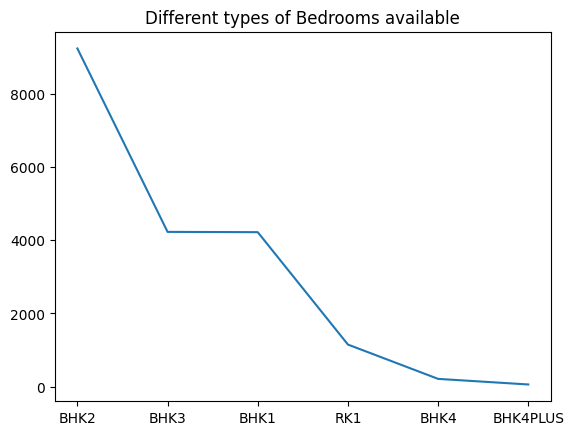

In [60]:
plt.title('Different types of Bedrooms available')
plt.plot(df2.type_bhk.value_counts());

In [106]:
df3 = df2.dropna()
df3.isnull().sum()

locality          0
balconies         0
bathroom          0
furnishingDesc    0
parking           0
rent_amount       0
property_size     0
type_bhk          0
facing            0
floor             0
dtype: int64

# Feature Engineering

In [107]:
df3['rent_per_sqft'] = df3['rent_amount'] /df3['property_size']
df3.head()

/var/folders/fj/6bcxvpyx3_z_pgcq8hqml31w0000gn/T/ipykernel_4292/2689955936.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['rent_per_sqft'] = df3['rent_amount'] /df3['property_size']


,locality,balconies,bathroom,furnishingDesc,parking,rent_amount,property_size,type_bhk,facing,floor,rent_per_sqft
0,Gachibowli,3,3,Semi,BOTH,28000,2200,BHK3,W,3,12.727273
1,Chandrayangutta,1,2,Unfurnished,TWO_WHEELER,15000,1200,BHK3,E,2,12.500000
2,Manikonda,3,3,Semi,BOTH,16000,1800,BHK3,E,0,8.888889
3,LB Nagar,1,2,Unfurnished,BOTH,9000,750,BHK2,W,2,12.000000
4,HITEC City,2,2,Semi,BOTH,32500,1250,BHK2,E,2,26.000000


In [108]:
len(df3.locality.unique())

2638

In [109]:
len(df3.locality.value_counts()[df3.locality.value_counts()<=10])

2428

In [102]:
other_loc = df3.locality.value_counts()[df3.locality.value_counts()<=10]
other_loc

Begumpet Airport    10
Ibrahim Bagh        10
 Hafeezpet          10
nizampet            10
Humayun Nagar       10
                    ..
Namalagundu          1
Medipattanam         1
Himayathnagar        1
Shilpa Park          1
Sikh Village,        1
Name: locality, Length: 2428, dtype: int64

In [110]:
df3.locality = df3.locality.apply(lambda x: 'other' if x in other_loc else x)
len(df3.locality.unique())

/var/folders/fj/6bcxvpyx3_z_pgcq8hqml31w0000gn/T/ipykernel_4292/1406296846.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.locality = df3.locality.apply(lambda x: 'other' if x in other_loc else x)


211

In [111]:
df3.locality = df3.locality.apply(lambda x: x.strip())
df3.head()

/var/folders/fj/6bcxvpyx3_z_pgcq8hqml31w0000gn/T/ipykernel_4292/319017733.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.locality = df3.locality.apply(lambda x: x.strip())


,locality,balconies,bathroom,furnishingDesc,parking,rent_amount,property_size,type_bhk,facing,floor,rent_per_sqft
0,Gachibowli,3,3,Semi,BOTH,28000,2200,BHK3,W,3,12.727273
1,other,1,2,Unfurnished,TWO_WHEELER,15000,1200,BHK3,E,2,12.500000
2,Manikonda,3,3,Semi,BOTH,16000,1800,BHK3,E,0,8.888889
3,LB Nagar,1,2,Unfurnished,BOTH,9000,750,BHK2,W,2,12.000000
4,HITEC City,2,2,Semi,BOTH,32500,1250,BHK2,E,2,26.000000


In [117]:
df3.replace({'type_bhk':{'BHK3':3, 'BHK2':2, 'BHK1':1, 'BHK4':4, 'RK1':0.5, 'BHK4PLUS':5}}, inplace=True)
df3.replace({'furnishingDesc':{'Semi':0.5, 'Unfurnished':0, 'Full':1}}, inplace=True)

df3.head()

/var/folders/fj/6bcxvpyx3_z_pgcq8hqml31w0000gn/T/ipykernel_4292/2173789963.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.replace({'type_bhk':{'BHK3':3, 'BHK2':2, 'BHK1':1, 'BHK4':4, 'RK1':0.5, 'BHK4PLUS':5}}, inplace=True)
/var/folders/fj/6bcxvpyx3_z_pgcq8hqml31w0000gn/T/ipykernel_4292/2173789963.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.replace({'furnishingDesc':{'Semi':0.5, 'Unfurnished':0, 'Full':1}}, inplace=True)


,locality,balconies,bathroom,furnishingDesc,parking,rent_amount,property_size,type_bhk,facing,floor,rent_per_sqft
0,Gachibowli,3,3,0.5,BOTH,28000,2200,3.0,W,3,12.727273
1,other,1,2,0.0,TWO_WHEELER,15000,1200,3.0,E,2,12.500000
2,Manikonda,3,3,0.5,BOTH,16000,1800,3.0,E,0,8.888889
3,LB Nagar,1,2,0.0,BOTH,9000,750,2.0,W,2,12.000000
4,HITEC City,2,2,0.5,BOTH,32500,1250,2.0,E,2,26.000000


# Outlier Detection

## while detecting outliers there are many methods to detect and remove the outliers like "Z-score", "boxplots", "percentile method", "Standard or Median absoulte devation" or "Domain Knowledge". since so far it seems the data set is pretty, we will be avoiding all the above methods and use domain knowledge and try to find if there are any outliers. 

## first lets focus on the columns area & bedrooms. according to sources like "RERA", some construction regulations of India a typical of 300 & 400-500 square feet is required for a 1BHK. using this assusmption lets check if there are any unsual entires in our data set. i'm gonna use ' 300 SQ.FT ' 

In [112]:
df3.shape

(19104, 11)

In [118]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19104 entries, 0 to 19109
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   locality        19104 non-null  object 
 1   balconies       19104 non-null  int64  
 2   bathroom        19104 non-null  int64  
 3   furnishingDesc  19104 non-null  float64
 4   parking         19104 non-null  object 
 5   rent_amount     19104 non-null  int64  
 6   property_size   19104 non-null  int64  
 7   type_bhk        19104 non-null  float64
 8   facing          19104 non-null  object 
 9   floor           19104 non-null  int64  
 10  rent_per_sqft   19104 non-null  float64
dtypes: float64(3), int64(5), object(3)
memory usage: 1.7+ MB


In [119]:
df3.head()

,locality,balconies,bathroom,furnishingDesc,parking,rent_amount,property_size,type_bhk,facing,floor,rent_per_sqft
0,Gachibowli,3,3,0.5,BOTH,28000,2200,3.0,W,3,12.727273
1,other,1,2,0.0,TWO_WHEELER,15000,1200,3.0,E,2,12.500000
2,Manikonda,3,3,0.5,BOTH,16000,1800,3.0,E,0,8.888889
3,LB Nagar,1,2,0.0,BOTH,9000,750,2.0,W,2,12.000000
4,HITEC City,2,2,0.5,BOTH,32500,1250,2.0,E,2,26.000000


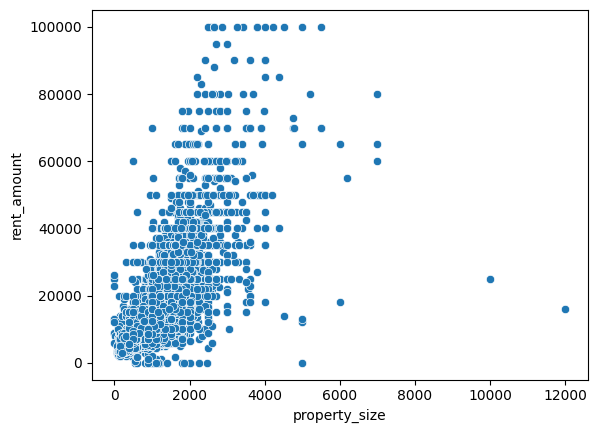

In [116]:
sns.scatterplot(x=df3.property_size, y=df3.rent_amount);

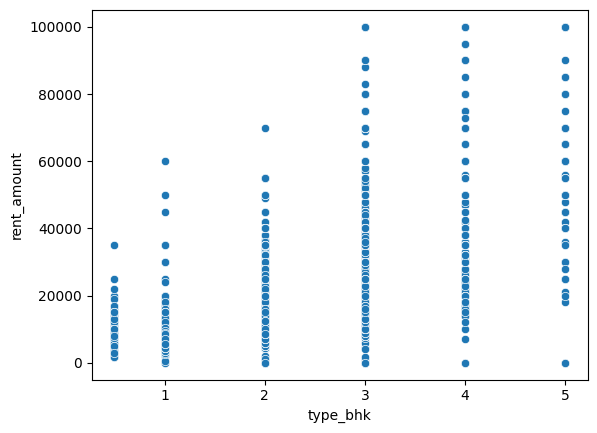

In [120]:
sns.scatterplot(x=df3.type_bhk, y=df3.rent_amount);

In [124]:
df3[df3.property_size/df3.type_bhk<300]

,locality,balconies,bathroom,furnishingDesc,parking,rent_amount,property_size,type_bhk,facing,floor,rent_per_sqft
582,Gachibowli,0,1,0.0,TWO_WHEELER,5000,100,0.5,None,0,50.000000
647,Miyapur,1,1,0.0,TWO_WHEELER,5500,144,0.5,W,1,38.194444
706,Jeedimetla,1,1,0.0,NONE,4000,100,0.5,E,1,40.000000
719,Begumpet,1,2,1.0,BOTH,25000,0,2.0,NE,6,inf
734,other,0,1,0.5,BOTH,10000,120,0.5,None,1,83.333333
...,...,...,...,...,...,...,...,...,...,...,...
18845,Miyapur,0,1,0.5,BOTH,8000,500,2.0,None,5,16.000000
18846,Secunderabad,1,1,0.5,TWO_WHEELER,5000,250,1.0,NE,0,20.000000
18937,Chanda Nagar,1,1,0.0,TWO_WHEELER,8000,200,1.0,E,2,40.000000
18977,other,2,2,0.0,BOTH,15000,400,2.0,N,1,37.500000


In [125]:
len(df3[df3.property_size/df3.type_bhk<300])

349

In [126]:
df4 = df3[~(df3.property_size/df3.type_bhk<300)]
df4.shape

(18755, 11)

In [127]:
df4.rent_per_sqft.describe()

count    18755.000000
mean        14.520844
std          6.085014
min          0.000000
25%         10.666667
50%         13.500000
75%         17.000000
max        120.000000
Name: rent_per_sqft, dtype: float64

In [129]:
def remove_rps_outliers(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby('locality'):
        m=np.mean(subdf.rent_per_sqft)
        st=np.std(subdf.rent_per_sqft) 
        reduced_df=subdf[(subdf.rent_per_sqft>(m-st))&(subdf.rent_per_sqft<=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df5= remove_rps_outliers(df4)
df5.shape

(14629, 11)

In [137]:
df5= df5[df5['balconies']<12]

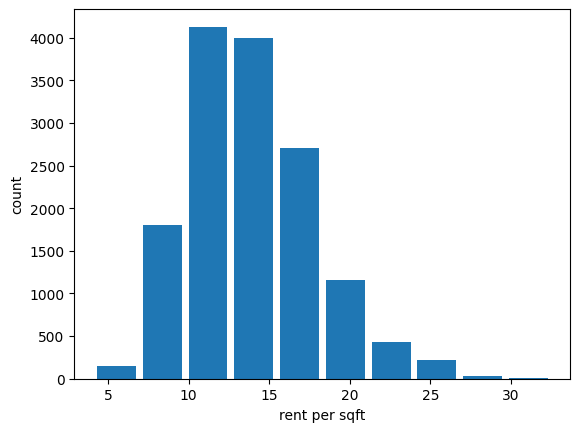

In [140]:
plt.hist(df5.rent_per_sqft,rwidth=0.85)
plt.xlabel('rent per sqft')
plt.ylabel('count')

plt.show()

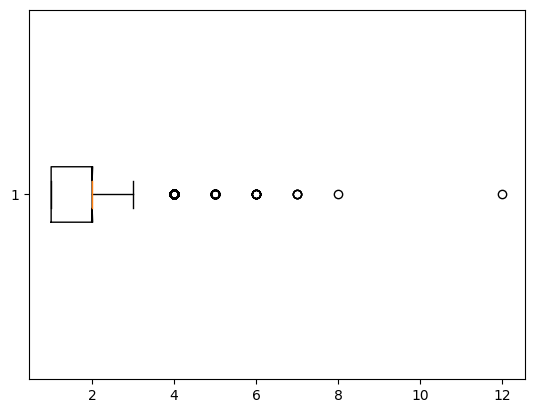

In [142]:
plt.boxplot(df5.bathroom, vert=False, notch=True);

In [143]:
df5=df5[df5['bathroom']<= df5.type_bhk+1]
df5.shape

(14601, 11)

# Model Building

In [139]:
df5.head()

,locality,balconies,bathroom,furnishingDesc,parking,rent_amount,property_size,type_bhk,facing,floor,rent_per_sqft
0,A S Rao Nagar,2,3,0.5,BOTH,21500,1600,3.0,E,2,13.437500
1,A S Rao Nagar,2,2,0.5,BOTH,10000,1100,2.0,E,2,9.090909
2,A S Rao Nagar,1,1,0.0,BOTH,5900,600,1.0,E,3,9.833333
3,A S Rao Nagar,1,1,0.0,BOTH,5900,600,1.0,E,3,9.833333
4,A S Rao Nagar,1,2,0.5,BOTH,17000,1600,3.0,W,0,10.625000


In [144]:
df5.replace({'parking':{'BOTH':3, 'TWO_WHEELER':1, 'FOUR_WHEELER':2, 'NONE':0}}, inplace=True)
df5.head()

/var/folders/fj/6bcxvpyx3_z_pgcq8hqml31w0000gn/T/ipykernel_4292/3435217854.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5.replace({'parking':{'BOTH':3, 'TWO_WHEELER':1, 'FOUR_WHEELER':2, 'NONE':0}}, inplace=True)


,locality,balconies,bathroom,furnishingDesc,parking,rent_amount,property_size,type_bhk,facing,floor,rent_per_sqft
0,A S Rao Nagar,2,3,0.5,3,21500,1600,3.0,E,2,13.437500
1,A S Rao Nagar,2,2,0.5,3,10000,1100,2.0,E,2,9.090909
2,A S Rao Nagar,1,1,0.0,3,5900,600,1.0,E,3,9.833333
3,A S Rao Nagar,1,1,0.0,3,5900,600,1.0,E,3,9.833333
4,A S Rao Nagar,1,2,0.5,3,17000,1600,3.0,W,0,10.625000


In [147]:
df5 = df5.drop(columns='facing')
df5.head()

,locality,balconies,bathroom,furnishingDesc,parking,rent_amount,property_size,type_bhk,floor,rent_per_sqft
0,A S Rao Nagar,2,3,0.5,3,21500,1600,3.0,2,13.437500
1,A S Rao Nagar,2,2,0.5,3,10000,1100,2.0,2,9.090909
2,A S Rao Nagar,1,1,0.0,3,5900,600,1.0,3,9.833333
3,A S Rao Nagar,1,1,0.0,3,5900,600,1.0,3,9.833333
4,A S Rao Nagar,1,2,0.5,3,17000,1600,3.0,0,10.625000


In [148]:
df6 = df5.copy()
df6.head()

,locality,balconies,bathroom,furnishingDesc,parking,rent_amount,property_size,type_bhk,floor,rent_per_sqft
0,A S Rao Nagar,2,3,0.5,3,21500,1600,3.0,2,13.437500
1,A S Rao Nagar,2,2,0.5,3,10000,1100,2.0,2,9.090909
2,A S Rao Nagar,1,1,0.0,3,5900,600,1.0,3,9.833333
3,A S Rao Nagar,1,1,0.0,3,5900,600,1.0,3,9.833333
4,A S Rao Nagar,1,2,0.5,3,17000,1600,3.0,0,10.625000


In [149]:
one_hot_encode = pd.get_dummies(df6.locality)
one_hot_encode.head()

,A S Rao Nagar,A. S. Rao Nagar,Adibatla,Adikmet,Almasguda,Alwal,Amberpet,Ameenpur,Ameerpet,Annojiguda,...,West Marredpally,Whisper Valley,Whitefields,Yapral,Yella Reddy Guda,Yousufguda,Zamistanpur,kondapur,kukatpally,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [151]:
df7 = pd.concat([df6, one_hot_encode.drop('other', axis='columns')], axis='columns')
df7.head()

,locality,balconies,bathroom,furnishingDesc,parking,rent_amount,property_size,type_bhk,floor,rent_per_sqft,...,Warasiguda,West Marredpally,Whisper Valley,Whitefields,Yapral,Yella Reddy Guda,Yousufguda,Zamistanpur,kondapur,kukatpally
0,A S Rao Nagar,2,3,0.5,3,21500,1600,3.0,2,13.437500,...,0,0,0,0,0,0,0,0,0,0
1,A S Rao Nagar,2,2,0.5,3,10000,1100,2.0,2,9.090909,...,0,0,0,0,0,0,0,0,0,0
2,A S Rao Nagar,1,1,0.0,3,5900,600,1.0,3,9.833333,...,0,0,0,0,0,0,0,0,0,0
3,A S Rao Nagar,1,1,0.0,3,5900,600,1.0,3,9.833333,...,0,0,0,0,0,0,0,0,0,0
4,A S Rao Nagar,1,2,0.5,3,17000,1600,3.0,0,10.625000,...,0,0,0,0,0,0,0,0,0,0


In [153]:
df7.shape

(14601, 205)

In [154]:
df7 = df7.drop(columns='locality')
df7.shape

(14601, 204)

In [157]:
X = df7.drop(columns='rent_amount')
y = df7.rent_amount

X.head()

,balconies,bathroom,furnishingDesc,parking,property_size,type_bhk,floor,rent_per_sqft,A S Rao Nagar,A. S. Rao Nagar,...,Warasiguda,West Marredpally,Whisper Valley,Whitefields,Yapral,Yella Reddy Guda,Yousufguda,Zamistanpur,kondapur,kukatpally
0,2,3,0.5,3,1600,3.0,2,13.437500,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2,0.5,3,1100,2.0,2,9.090909,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0.0,3,600,1.0,3,9.833333,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0.0,3,600,1.0,3,9.833333,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,2,0.5,3,1600,3.0,0,10.625000,1,0,...,0,0,0,0,0,0,0,0,0,0


In [158]:
y.head()

0    21500
1    10000
2     5900
3     5900
4    17000
Name: rent_amount, dtype: int64

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

In [216]:
models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(),
    'Ridge Regression': Ridge()
}

In [217]:
param_grids = {
    'Linear Regression': {},
    'Lasso Regression': {'alpha': [0.001, 0.01, 0.1, 1, 10]},
    'Ridge Regression': {'alpha': [0.001, 0.01, 0.1, 1, 10]}
}

In [218]:
def train_and_tune_model(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    return best_model

def predict_and_evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    return r2, mae, mse, rmse

In [219]:
best_models = {}
model_scores = {}

for model_name, model in models.items():
    print(f'Training and tuning {model_name}...')
    param_grid = param_grids[model_name]
    best_model = train_and_tune_model(model, param_grid, X_train, y_train)
    best_models[model_name] = best_model
    r2, _, _, _ = predict_and_evaluate(best_model, X_test, y_test)
    model_scores[model_name] = r2
    print(f'{model_name} - R-squared: {r2:.4f}')

Training and tuning Linear Regression...
Linear Regression - R-squared: 0.9389
Training and tuning Lasso Regression...
Lasso Regression - R-squared: 0.9385
Training and tuning Ridge Regression...
Ridge Regression - R-squared: 0.9389


In [220]:
model_names = list(models.keys())
r2_scores = [model_scores[name] for name in model_names]

best_model_name = max(model_scores, key=model_scores.get)
best_model_for_deployment = best_models[best_model_name]

print(f'\nThe best model for deployment is: {best_model_name} with R-squared: {model_scores[best_model_name]:.4f}')


The best model for deployment is: Linear Regression with R-squared: 0.9389


In [221]:
best_model = best_models[best_model_name]
best_model

LinearRegression()

In [195]:
X.columns

Index(['balconies', 'bathroom', 'furnishingDesc', 'parking', 'property_size',
       'type_bhk', 'floor', 'rent_per_sqft', 'A S Rao Nagar',
       'A. S. Rao Nagar',
       ...
       'Warasiguda', 'West Marredpally', 'Whisper Valley', 'Whitefields',
       'Yapral', 'Yella Reddy Guda', 'Yousufguda', 'Zamistanpur', 'kondapur',
       'kukatpally'],
      dtype='object', length=203)

In [211]:
np.where(X.columns == 'Gachibowli')[0][0]

50

In [212]:
def predict_price(locality, balconies, bathroom, furnishingDesc, parking, property_size, type_bhk, floor):
    loc_index = np.where(X.columns == locality)[0][0]
   
    x = np.zeros(len(X.columns))
    x[0] = balconies
    x[1] = bathroom
    x[2] = furnishingDesc
    x[3] = parking
    x[4] = property_size
    x[5] = type_bhk
    x[6] = floor
    
    if loc_index >= 0:
        x[loc_index] = 1
    return best_model.predict([x])[0]

In [202]:
predict_price('Gachibowli',3,3,0.5,3,2000,3,3)

/Users/pardhasaradhichukka/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


14788.787135199836

# Saving IMP Artifacts

In [229]:
import json
columns = {
    'data_columns': [col.lower() for col in X.columns]
}
with open("columns.json", "w") as f:
    f.write(json.dumps(columns))

In [222]:
import pickle
with open('HYD_Rent_Predictor.pkl','wb') as f:
    pickle.dump(best_model,f)